In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib widget

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense


In [2]:
df= pd.read_csv("BTC-USD.csv")

In [3]:
df.head

<bound method NDFrame.head of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710  2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711  2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712  2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
0       457.334015     

In [11]:
df.shape

(2713, 7)

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [13]:
closed=df[["Date","Close"]]

In [14]:
closed.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


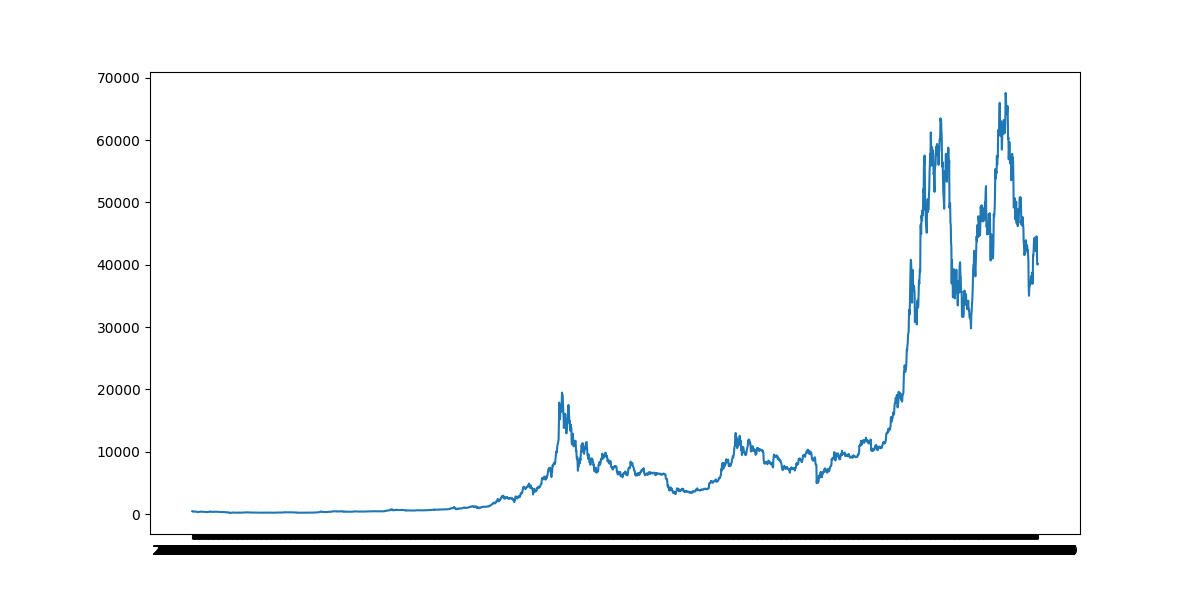

In [15]:
plt.close()

plt.figure(1,figsize=(12,6))

plt.plot(closed['Date'],closed['Close'])
plt.show()

In [16]:
#   shart k az che tarikhi nemodar neshan dahad
price=closed[closed['Date'] >= '2021-01-01']

In [17]:
price

,Date,Close
2298,2021-01-01,29374.152344
2299,2021-01-02,32127.267578
2300,2021-01-03,32782.023438
2301,2021-01-04,31971.914063
2302,2021-01-05,33992.429688
...,...,...
2708,2022-02-15,44575.203125
2709,2022-02-16,43961.859375
2710,2022-02-17,40538.011719
2711,2022-02-18,40030.976563


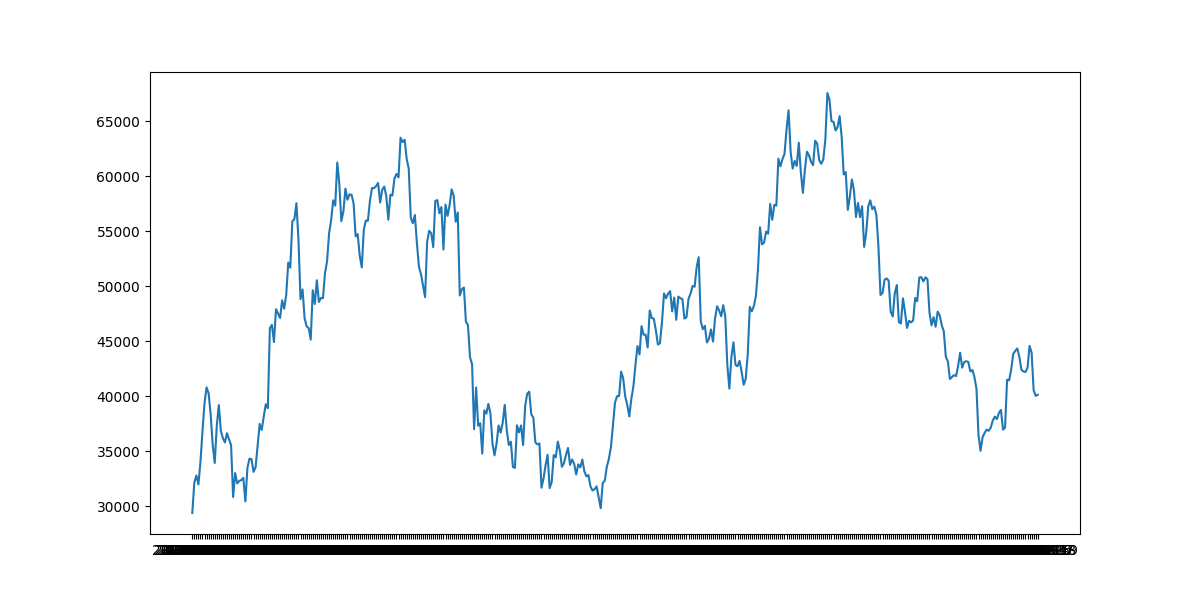

In [18]:
plt.close()

plt.figure(1,figsize=(12,6))

plt.plot(price['Date'],price['Close'])
plt.show()

In [19]:
x=price['Close']
print(x[0:5])

2298    29374.152344
2299    32127.267578
2300    32782.023438
2301    31971.914063
2302    33992.429688
Name: Close, dtype: float64


In [20]:
scaler= MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(np.array(x).reshape(-1,1))

In [21]:
x.shape

(415, 1)

In [22]:
x_train=x[0:332]
x_test=x[332:]

In [23]:
x_train.shape

(332, 1)

In [24]:
# ساخت دیتاست جدید با حلقه 
x1=[]
y1=[]
a=[]
b=0
for i in range(len(x_train)-5-1):
    a=x_train[i:i+5,0]
    b=x_train[i+5,0]
    x1.append(a)
    y1.append(b)

x_train1=np.array(x1)
y_train1=np.array(y1)

print(x_train1.shape)

x1=[]
y1=[]
a=[]
b=0
for i in range(len(x_test)-5-1):
    a=x_test[i:i+5,0]
    b=x_test[i+5,0]
    x1.append(a)
    y1.append(b)

x_test1=np.array(x1)
y_test1=np.array(y1)


print(x_test1.shape)

(326, 5)
(77, 5)


In [25]:
#اضافه کردن بعد به دیتاست برای ساخت lstm
x_train1=x_train1.reshape(326, 5, 1)
x_test1=x_test1.reshape(77, 5, 1)
print(x_train1.shape)
print(x_test1.shape)

(326, 5, 1)
(77, 5, 1)


In [26]:
x_train1[0]

array([[0.        ],
       [0.0720849 ],
       [0.08922839],
       [0.06801727],
       [0.1209205 ]])

In [27]:
# model= Sequential()
# model.add(LSTM(10,activation='relu',input_shape=(None,1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(5,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
h= model.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=500, verbose=0)

# h = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=500, verbose=0)

In [29]:
train_predict=model.predict(x_train1)
test_predict=model.predict(x_test1)

test_predict.shape,train_predict.shape

3/3 [==============================] - 0s 4ms/step


((77, 1), (326, 1))

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
original_ytrain=scaler.inverse_transform(y_train1.reshape(-1,1))
original_ytest=scaler.inverse_transform(y_test1.reshape(-1,1))

In [31]:
print("vaqeii:",original_ytest[1])
print("robot:",test_predict[1])

vaqeii: [49368.847656]
robot: [49474.29]


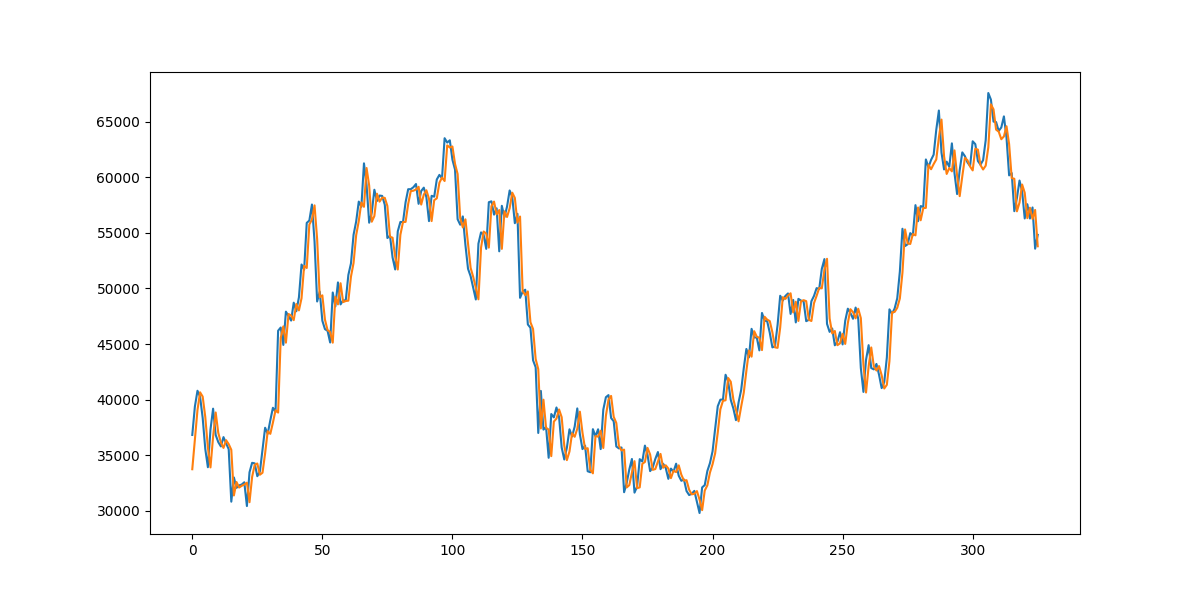

In [32]:
plt.close()
plt.figure(1,(12,6))

plt.plot(original_ytrain)
plt.plot(train_predict)
plt.show()